In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("space_missions.csv", encoding="latin1")

In [3]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [4]:
df.shape

(4630, 9)

In [5]:
df.tail()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [7]:
df["MissionStatus"].value_counts()

MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64

In [8]:
success_count = df[df["MissionStatus"].str.lower() == "success"].shape[0]
total_count = df.shape[0]

In [9]:
success_rate = (success_count /total_count) *100

In [10]:
print(f"Success Rate: {success_rate:.2f}%")

Success Rate: 89.89%


In [11]:
len(df["Rocket"].unique())

370

In [12]:
len(df["Company"].unique())

62

In [13]:
df["Location"].value_counts()

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan               251
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   211
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Pad A, Boca Chica, Texas, USA                              1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Launch Plateform, Shahrud Missile Test Site                1
K-84 Submarine, Barents Sea Launch Area, Barents Sea       1
LC-9A, Taiyuan Satellite Launch Center, China              1
Name: count, Length: 158, dtype: int64

In [14]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

In [15]:
df["Country"].nunique()

22

In [16]:
success_df = df[df['MissionStatus'].str.lower() == 'success']

In [17]:
success_counts = success_df['Country'].value_counts()

In [18]:
most_success_country = success_counts.idxmax()
most_success_count = success_counts.max()

In [19]:
print(f"Country with most successful launches: {most_success_country} ({most_success_count} successes)")

# Optional: Show top 5 countries
print("\nTop 5 countries by successful launches:")
print(success_counts.head(5))

Country with most successful launches: Russia (1323 successes)

Top 5 countries by successful launches:
Country
Russia        1323
USA           1298
Kazakhstan     625
China          335
France         299
Name: count, dtype: int64


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\2372114084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_counts.head(top_n).values, y=success_counts.head(top_n).index, palette="viridis")


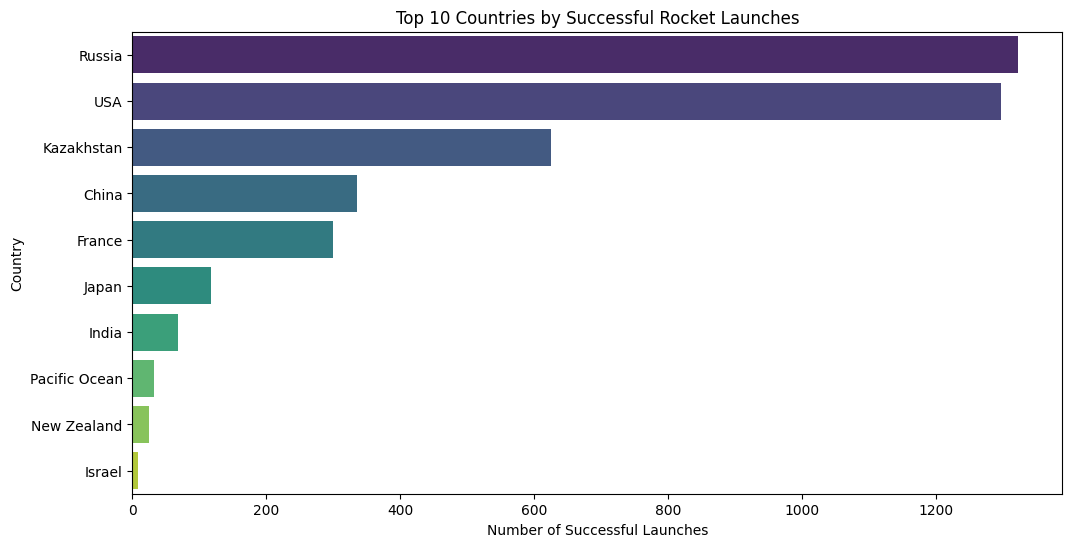

In [20]:
top_n = 10
plt.figure(figsize=(12,6))
sns.barplot(x=success_counts.head(top_n).values, y=success_counts.head(top_n).index, palette="viridis")
plt.xlabel("Number of Successful Launches")
plt.ylabel("Country")
plt.title(f"Top {top_n} Countries by Successful Rocket Launches")
plt.savefig("top_10_by_success.png", dpi=300)
plt.show()

In [22]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Fill missing values in Time if needed
df['Time'] = df['Time'].fillna("Unknown")


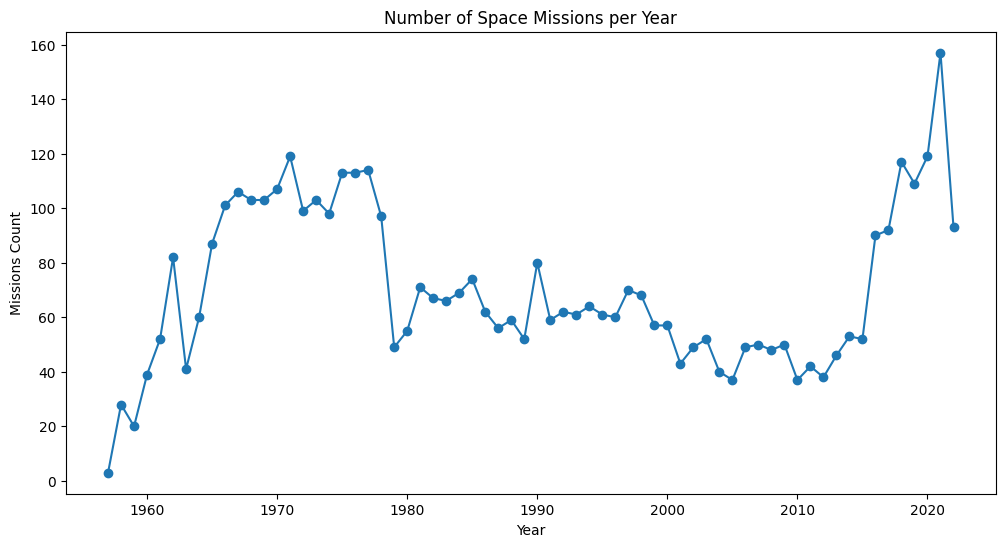

In [37]:
missions_per_year = df.groupby('Year').size()

plt.figure(figsize=(12,6))
missions_per_year.plot(kind='line', marker='o')
plt.title("Number of Space Missions per Year")
plt.xlabel("Year")
plt.ylabel("Missions Count")
plt.savefig("trend.png", dpi=300)
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\1351163146.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missions_by_country.index, y=missions_by_country.values, palette="viridis")


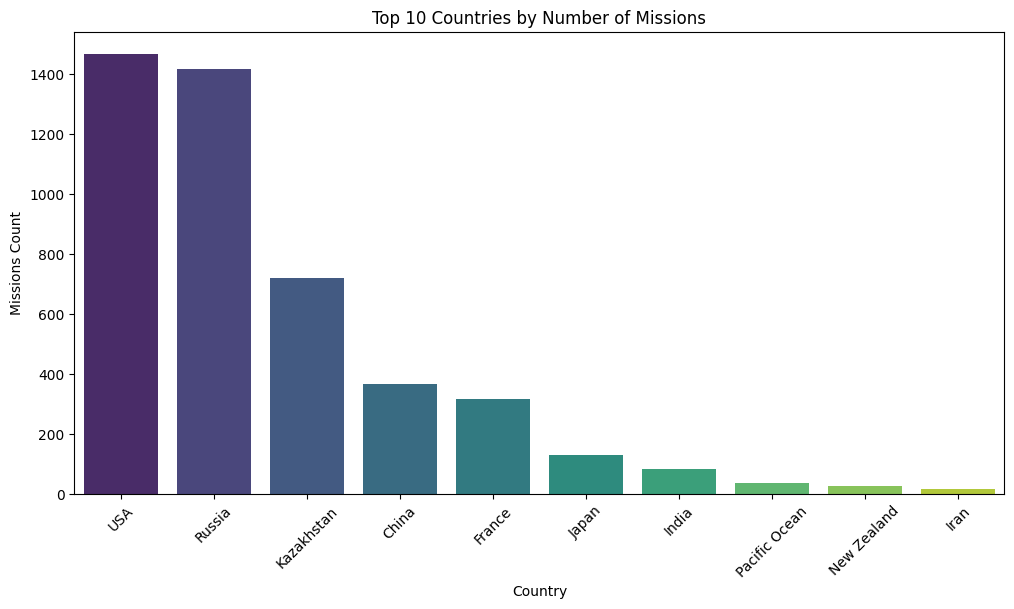

In [38]:
# Extract country from Location (last part after comma)
df['Country'] = df['Location'].apply(lambda x: x.split(",")[-1].strip())

missions_by_country = df['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=missions_by_country.index, y=missions_by_country.values, palette="viridis")
plt.title("Top 10 Countries by Number of Missions")
plt.xticks(rotation=45)
plt.ylabel("Missions Count")
plt.savefig("missionbycon.png", dpi=300)
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\3220017254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missions_by_company.index, y=missions_by_company.values, palette="plasma")


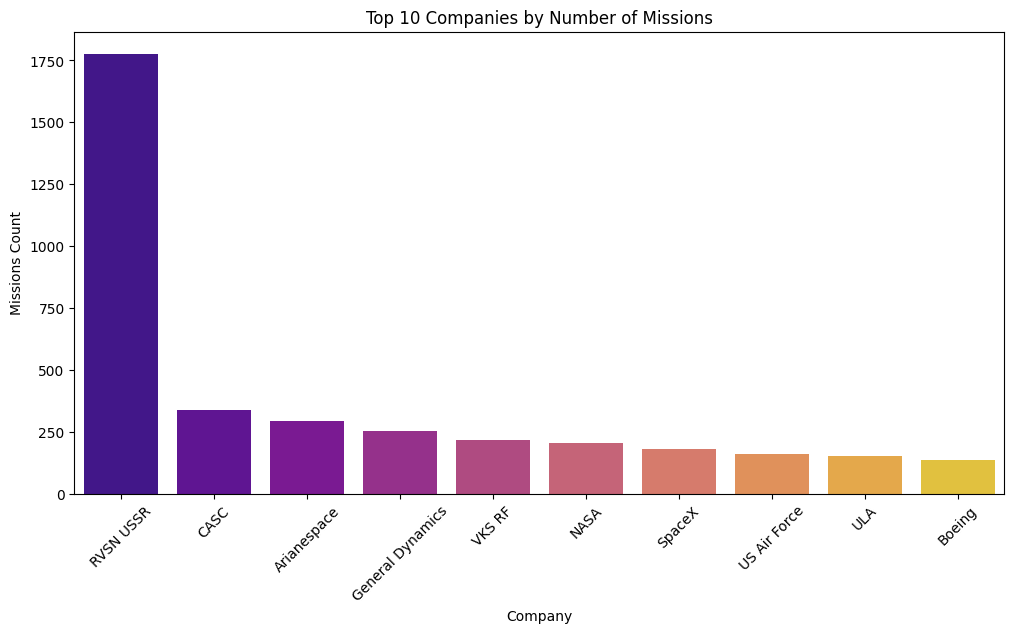

In [25]:
missions_by_company = df['Company'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=missions_by_company.index, y=missions_by_company.values, palette="plasma")
plt.title("Top 10 Companies by Number of Missions")
plt.xticks(rotation=45)
plt.ylabel("Missions Count")
plt.show()


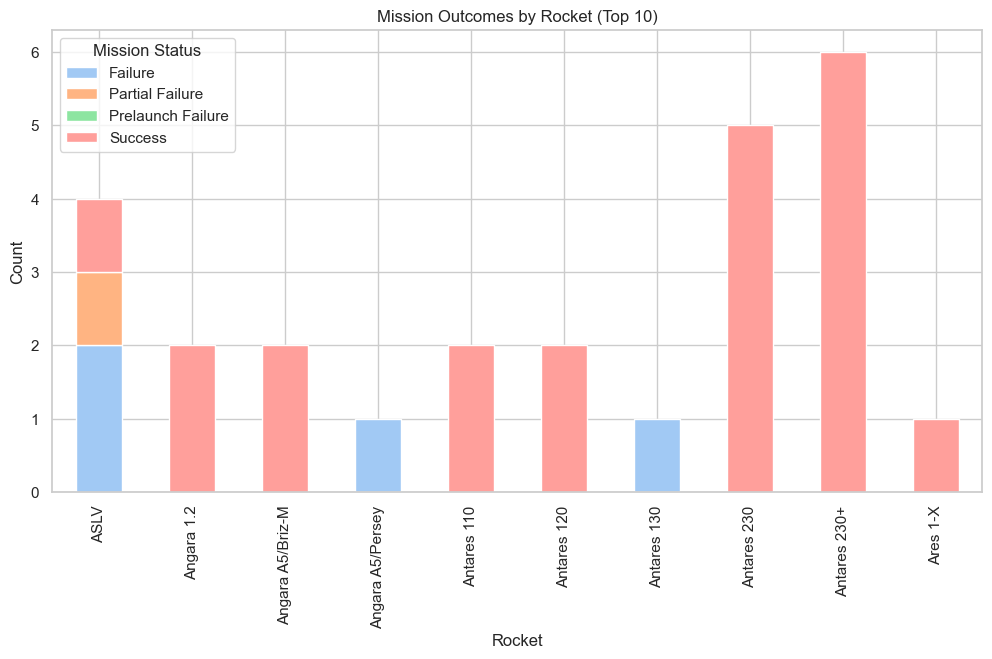

In [40]:
sns.set_theme(style="whitegrid", palette="pastel")  # you can try "deep", "dark", "muted", "colorblind"

# Count mission outcomes by rocket
outcomes = df.groupby(['Rocket', 'MissionStatus']).size().unstack(fill_value=0)

# Plot
outcomes.head(10).plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Mission Outcomes by Rocket (Top 10)")
plt.ylabel("Count")
plt.xlabel("Rocket")
plt.savefig("success.png", dpi=300)
plt.legend(title="Mission Status")
plt.show()

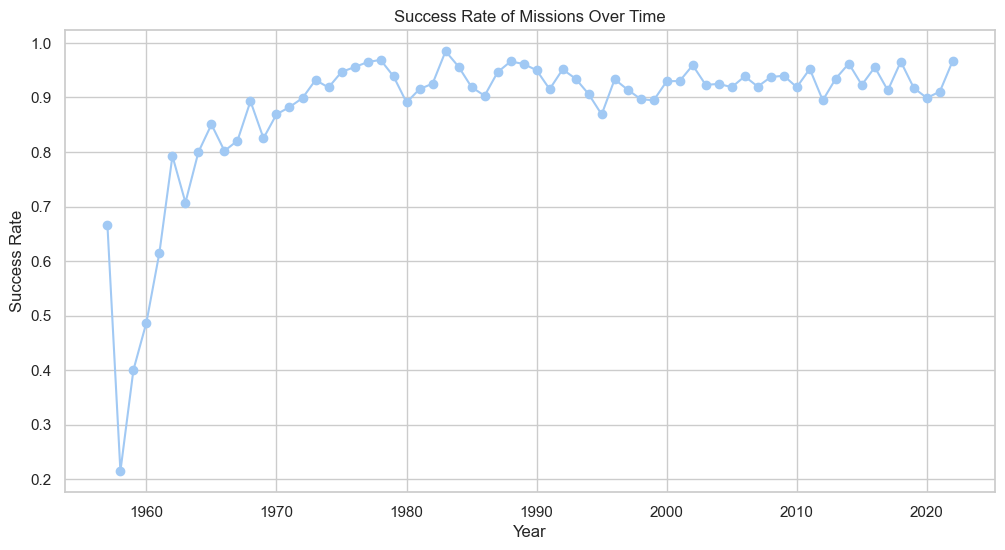

In [41]:
success_rate = df.groupby('Year')['MissionStatus'].apply(lambda x: (x=="Success").mean())

plt.figure(figsize=(12,6))
success_rate.plot(kind='line', marker='o')
plt.title("Success Rate of Missions Over Time")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.savefig("overtimesuccess.png", dpi=300)
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\571813825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


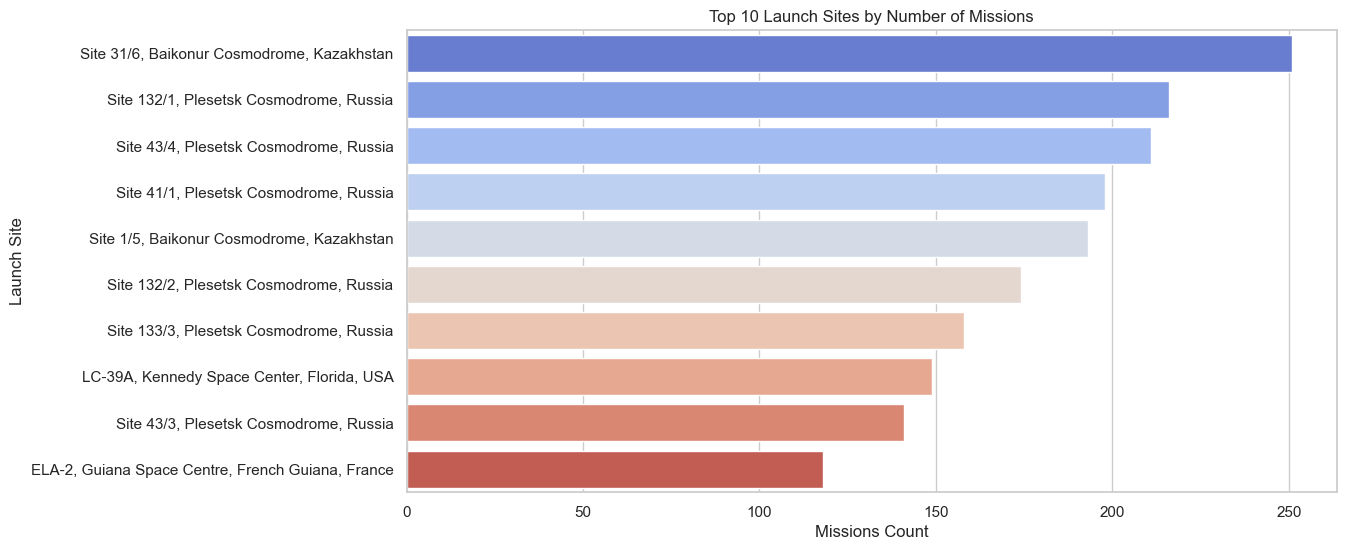

In [45]:
launch_sites = df['Location'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    y=launch_sites.index, 
    x=launch_sites.values, 
    palette="coolwarm"
)
plt.title("Top 10 Launch Sites by Number of Missions")
plt.xlabel("Missions Count")
plt.ylabel("Launch Site")
plt.savefig("location.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\3172837715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


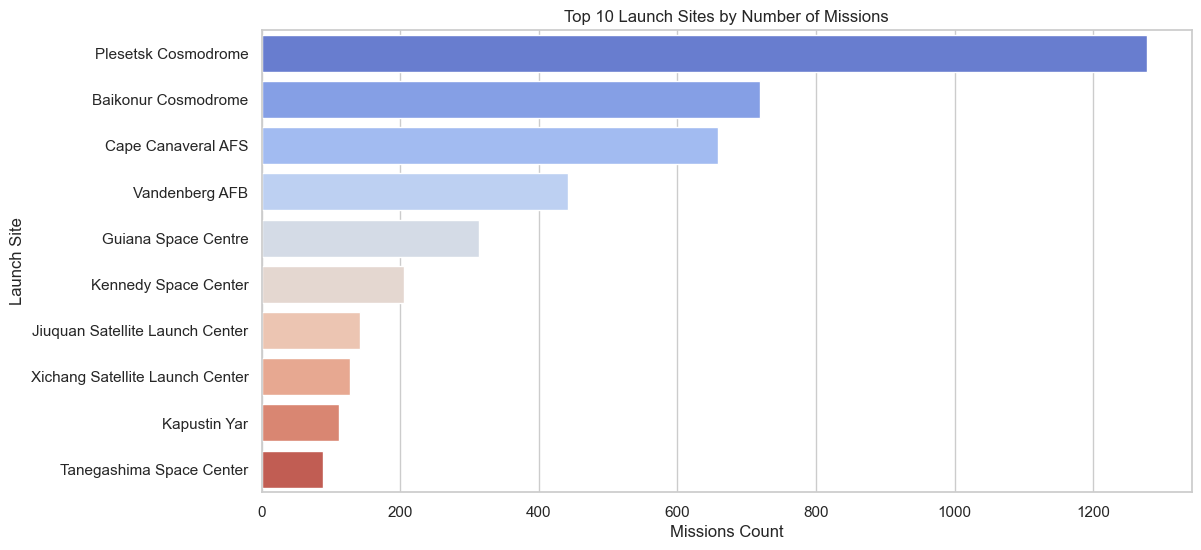

In [47]:
# Extract just the launch site name (second part)
df['LaunchSite'] = df['Location'].apply(lambda x: x.split(",")[1].strip() if "," in x else x)

launch_sites = df['LaunchSite'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    y=launch_sites.index,
    x=launch_sites.values,
    palette="coolwarm"
)
plt.title("Top 10 Launch Sites by Number of Missions")
plt.xlabel("Missions Count")
plt.ylabel("Launch Site")
plt.savefig("location.png", dpi=300, bbox_inches="tight")
plt.show()


In [48]:
launch_sites

LaunchSite
Plesetsk Cosmodrome                1278
Baikonur Cosmodrome                 719
Cape Canaveral AFS                  658
Vandenberg AFB                      442
Guiana Space Centre                 314
Kennedy Space Center                205
Jiuquan Satellite Launch Center     142
Xichang Satellite Launch Center     128
Kapustin Yar                        112
Tanegashima Space Center             88
Name: count, dtype: int64

C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\1024336465.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


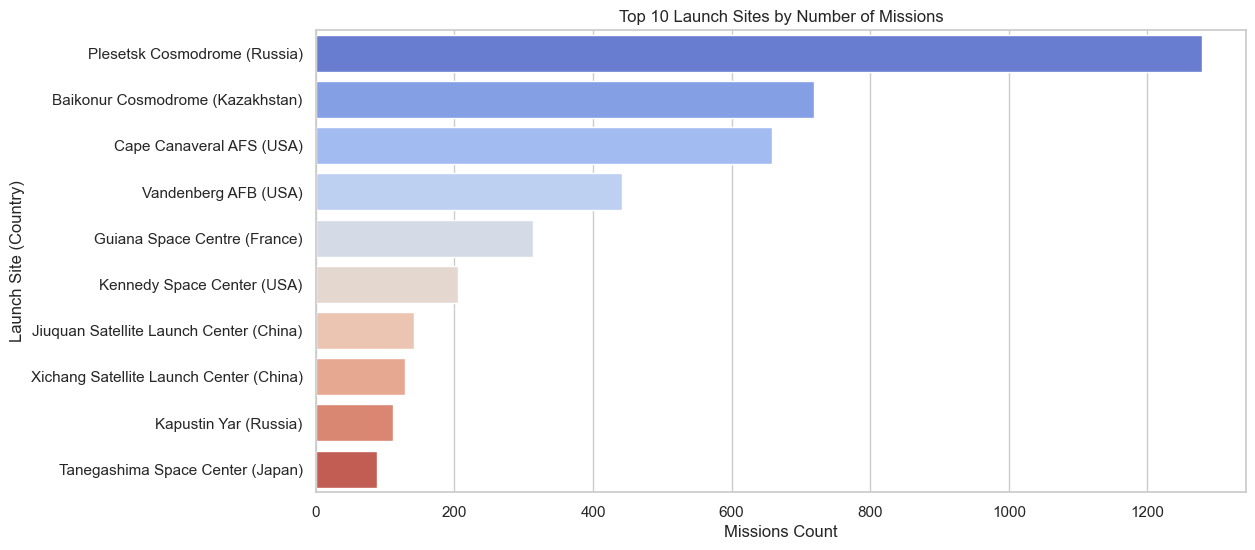

In [49]:
# Extract launch site + country
def extract_site_country(x):
    parts = x.split(",")
    if len(parts) >= 3:
        site = parts[1].strip()
        country = parts[-1].strip()
        return f"{site} ({country})"
    else:
        return x  # fallback if format is different

df['LaunchSite'] = df['Location'].apply(extract_site_country)

launch_sites = df['LaunchSite'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    y=launch_sites.index,
    x=launch_sites.values,
    palette="coolwarm"
)
plt.title("Top 10 Launch Sites by Number of Missions")
plt.xlabel("Missions Count")
plt.ylabel("Launch Site (Country)")
plt.savefig("location.png", dpi=300, bbox_inches="tight")
plt.show()


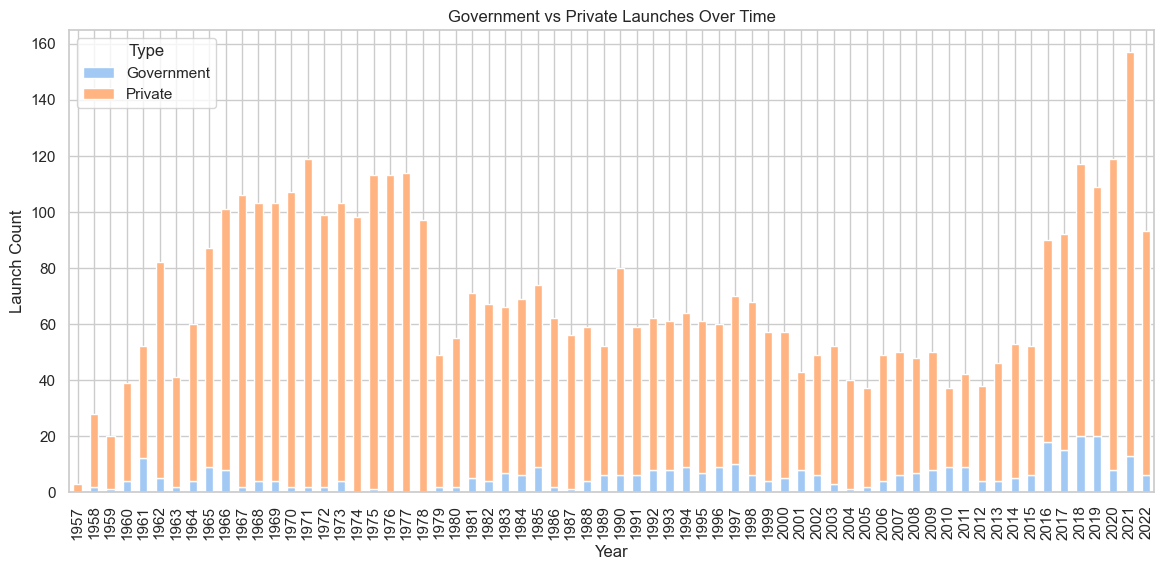

In [53]:
# Tag companies as Government or Private
gov_agencies = ["NASA", "Roscosmos", "CNSA", "ISRO", "JAXA", "ESA"]
df['Type'] = df['Company'].apply(lambda x: "Government" if any(g in x for g in gov_agencies) else "Private")

launches_by_type = df.groupby(['Year','Type']).size().unstack(fill_value=0)

launches_by_type.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Government vs Private Launches Over Time")
plt.ylabel("Launch Count")
plt.savefig("govt-private.png", dpi=300)
plt.show()


In [54]:
df["Company"].unique()

array(['RVSN USSR', 'US Navy', 'AMBA', 'US Air Force', 'NASA',
       'General Dynamics', 'Martin Marietta', "Armée de l'Air", 'UT',
       'ASI', 'OKB-586', 'CECLES', 'Yuzhmash', 'CASC', 'CNES',
       'Roscosmos', 'ISAS', 'RAE', 'MHI', 'ISRO', 'ESA', 'Arianespace',
       'IAI', 'Boeing', 'Douglas', 'Northrop', 'Lockheed', 'VKS RF',
       'MITT', 'ILS', 'EER', 'AEB', 'SRC', 'KCST', 'Sea Launch',
       'Kosmotras', 'Eurockot', 'CASIC', 'Starsem', 'SpaceX', 'ULA',
       'Land Launch', 'ISA', 'KARI', 'JAXA', 'Khrunichev', 'Blue Origin',
       'Sandia', 'ExPace', 'Rocket Lab', 'Exos', 'Landspace', 'OneSpace',
       'i-Space', 'IRGC', 'Virgin Orbit', 'Astra', 'Galactic Energy',
       'Virgin Galactic', 'GK LS', 'Firefly', 'CAS Space'], dtype=object)

In [55]:
gov_agencies = [
    "NASA", "Roscosmos", "CNSA", "ISRO", "JAXA", "ESA", "US Air Force", 
    "US Navy", "RVSN USSR", "Armée de l'Air", "VKS RF", "KCST", "KARI", 
    "ISAS", "CNES", "AEB", "IRGC", "ASI", "SRC", "UT", "RAE"
]


In [56]:
private_companies = [
    "SpaceX", "Blue Origin", "Rocket Lab", "Virgin Orbit", "Virgin Galactic",
    "Astra", "Firefly", "ExPace", "Landspace", "OneSpace", "i-Space", 
    "Galactic Energy", "CAS Space", "Exos"
]


In [57]:
semi_private = [
    "Arianespace", "General Dynamics", "Martin Marietta", "Boeing", 
    "Lockheed", "Northrop", "Douglas", "Sea Launch", "ILS", "Eurockot", 
    "Kosmotras", "Starsem", "ULA", "MHI", "Khrunichev", "GK LS", "Land Launch"
]


In [58]:
def classify_company(x):
    if x in gov_agencies:
        return "Government"
    elif x in private_companies:
        return "Private"
    elif x in semi_private:
        return "Commercial / Joint Venture"
    else:
        return "Other"

df['Type'] = df['Company'].apply(classify_company)


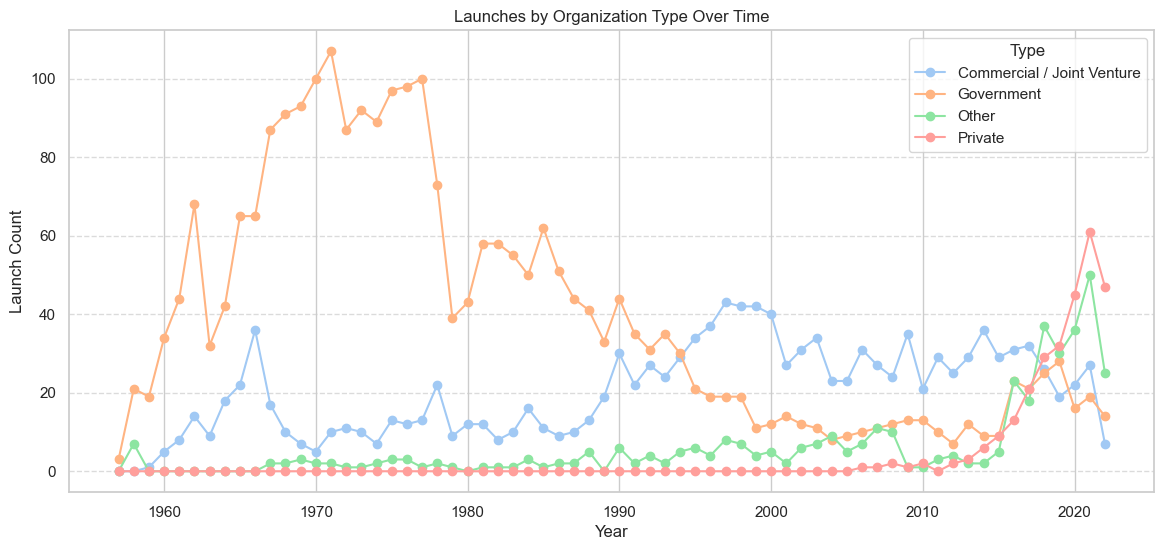

In [60]:
launches_by_type = df.groupby(['Year','Type']).size().unstack(fill_value=0)

launches_by_type.plot(figsize=(14,6), marker="o")
plt.title("Launches by Organization Type Over Time")
plt.ylabel("Launch Count")
plt.xlabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Type")
plt.savefig("type_over.png", dpi=300)
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\2078765940.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reliable.index, y=top_reliable['SuccessRate'], palette="viridis")


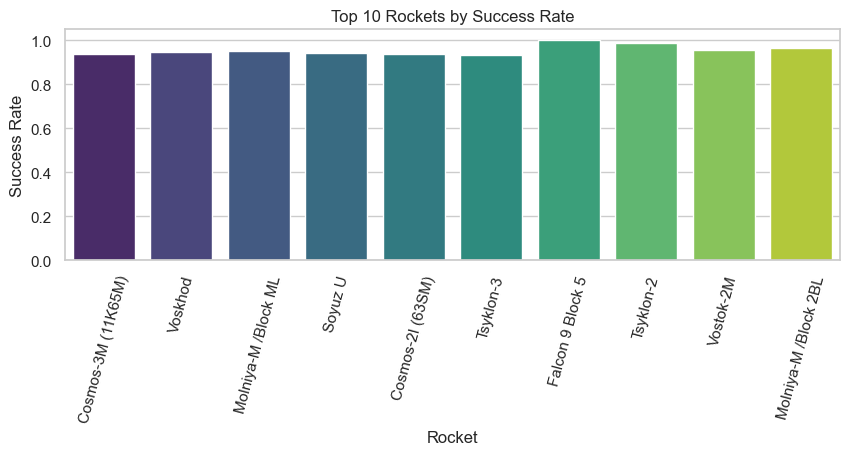

In [69]:
rocket_success = df.groupby(['Rocket','MissionStatus']).size().unstack(fill_value=0)
rocket_success['SuccessRate'] = rocket_success['Success'] / rocket_success.sum(axis=1)

top_reliable = rocket_success.sort_values('Success', ascending=False).head(10)

plt.figure(figsize=(10,3))
sns.barplot(x=top_reliable.index, y=top_reliable['SuccessRate'], palette="viridis")
plt.xticks(rotation=75)
plt.title("Top 10 Rockets by Success Rate")
plt.ylabel("Success Rate")
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\1659014836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


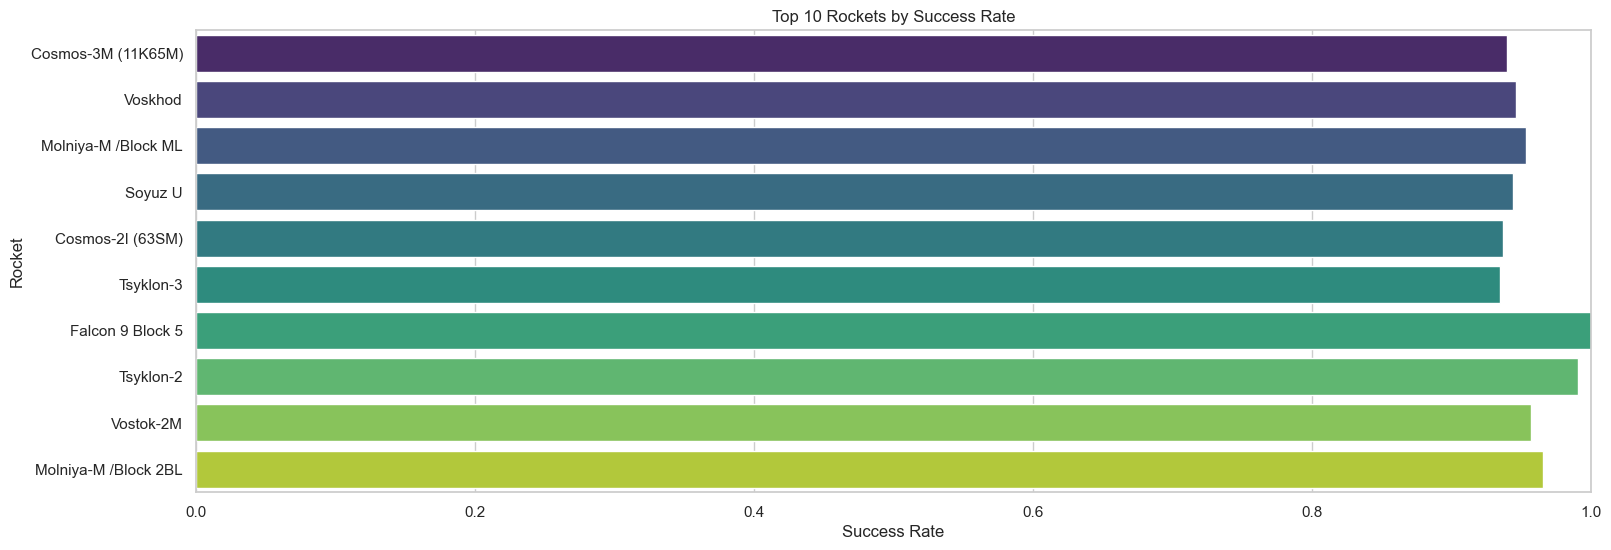

In [67]:
plt.figure(figsize=(18,6))
sns.barplot(
    y=top_reliable.index, 
    x=top_reliable['SuccessRate'], 
    palette="viridis"
)
plt.title("Top 10 Rockets by Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Rocket")
plt.xlim(0,1)  # since success rate is between 0 and 1
plt.savefig("suc.png", dpi=300)
plt.show()


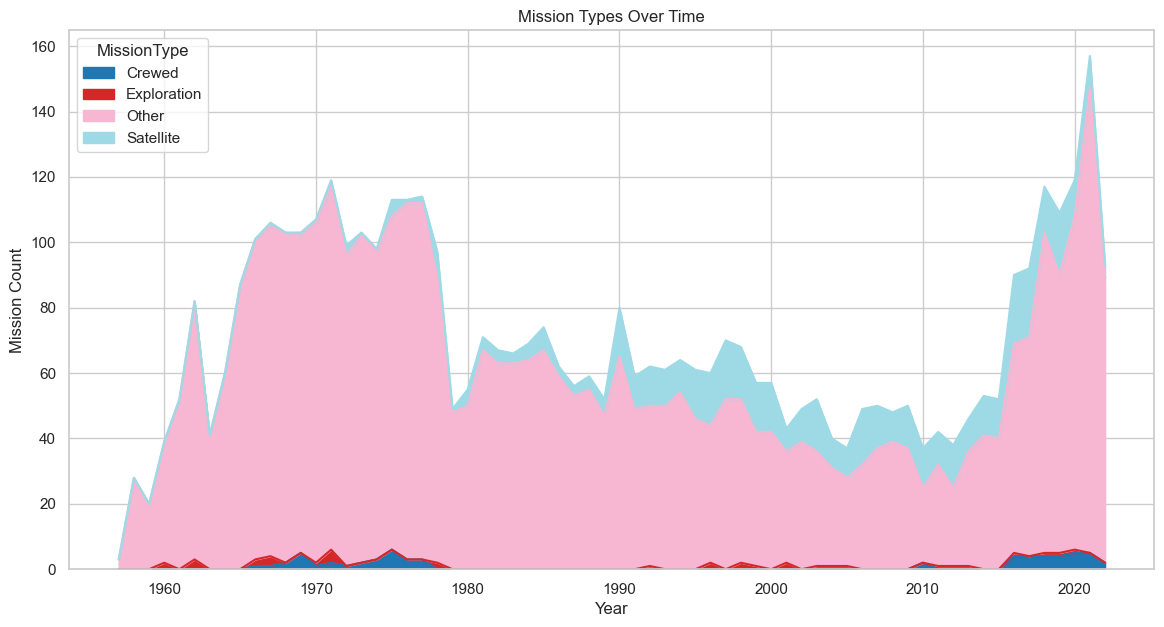

In [77]:
# Assuming 'Mission' column has keywords
def categorize_mission(m):
    m = str(m).lower()
    if "sat" in m or "telecom" in m or "gps" in m or "comm" in m:
        return "Satellite"
    elif "mars" in m or "moon" in m or "lunar" in m or "venus" in m or "probe" in m:
        return "Exploration"
    elif "military" in m or "defense" in m or "spy" in m or "navy" in m:
        return "Military"
    elif "crew" in m or "astronaut" in m or "manned" in m or "dragon" in m or "soyuz" in m:
        return "Crewed"
    else:
        return "Other"

df['MissionType'] = df['Mission'].apply(categorize_mission)

missions_over_time = df.groupby(['Year','MissionType']).size().unstack(fill_value=0)

missions_over_time.plot(kind='area', stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Mission Types Over Time")
plt.ylabel("Mission Count")
plt.show()


In [75]:
missions_k = df["Mission"].unique()

In [76]:
for k in missions_k:
    print(k)

Sputnik-1
Sputnik-2
Vanguard TV3
Explorer 1
Vanguard TV3BU
Explorer 2
Vanguard 1
Explorer 3
Sputnik-3 #1
Vanguard TV5
Sputnik-3 #2
Vanguard SLV-1
Vanguard SLV-2
Pilot-1 (D1)
Explorer 4
Pilot-2 (D2)
Pioneer 0
Pilot-3 (D3)
Explorer 5
Pilot-4 (R1)
Pilot-5 (R2)
Pilot-6 (R3
E-1 nâ Â­1 (Luna-1)
Vanguard SLV-3
Pioneer 1
E-1 nâ Â­2 (Luna-1)
Beacon 1
Pioneer 2
E-1 nâ Â­3 (Luna-1)
Pioneer 3
SCORE
Luna-1
Vanguard 2
Discoverer 1
Discoverer 2
Vanguard SLV-5
Discoverer 3
E-1A nâ Â­1 (Luna-2)
Vanguard SLV-6
Discoverer 4
Explorer 6
Discoverer 5
Discoverer 6
Big Joe 1
Luna-2
Transit 1A
Vanguard 3
Luna-3
Discoverer 7
Discoverer 8
Pioneer P-3
Discoverer 9
Discoverer 10
Midas 1
Pioneer 5
TIROS-1
Transit 1B
E-3 nâ Â­2 (Luna-3)
Discoverer 11
E-3 nâ Â­3 (Luna-3)
Echo 1
Korabl-Sputnik 1
Midas 2
Transit 2A & GRAB-1
Discoverer 12
1K nâ Â­2 (Korabl-Sputnik 2)
Mercury-Atlas 1 (MA-1)
Discoverer 13
Echo 1A
Discoverer 14
Courier 1A
Korabl-Sputnik 2
Discoverer 15
Pioneer P-30
Courier 1B
1M nâ Â­1 (Marsnik 1)


In [84]:
import re

def clean_mission(name):
    if pd.isna(name):
        return name
    name = str(name).strip()
    
    # Remove anything in parentheses ( )
    name = re.sub(r"\(.*?\)", "", name)
    
    # Remove unwanted symbols, numbers, and extra spaces
    name = re.sub(r"[^A-Za-z ]+", " ", name)
    
    # Normalize spacing
    name = re.sub(r"\s+", " ", name).strip()
    
    # Fix common encodings like "E nâ Â­"
    name = name.replace("nâ Â­", "na").replace("Â­", "").replace("â", "")
    
    return name
# Apply to your Mission column
df["Cleaned_Mission"] = df["Mission"].apply(clean_mission)

# Get unique cleaned names
unique_missions = df["Cleaned_Mission"].unique()

print("Unique Missions:", unique_missions)

Unique Missions: ['Sputnik' 'Vanguard TV' 'Explorer' ... 'Wise One Looks Ahead'
 'LARES Cubesats' 'Wentian']


In [89]:
df["Mission"].to_csv("unique_mission.csv")

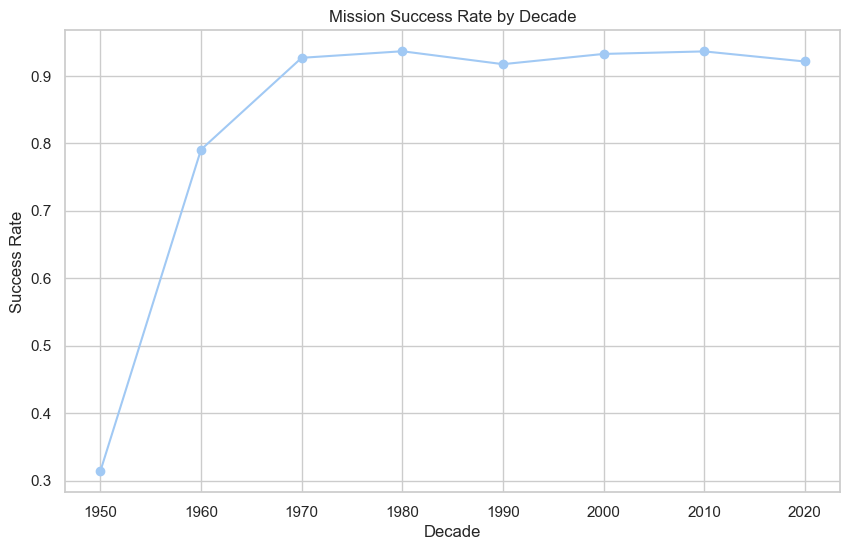

In [91]:
df['Decade'] = (df['Year']//10)*10
decade_success = df.groupby('Decade')['MissionStatus'].apply(lambda x: (x=="Success").mean())

plt.figure(figsize=(10,6))
decade_success.plot(marker='o')
plt.title("Mission Success Rate by Decade")
plt.ylabel("Success Rate")
plt.show()


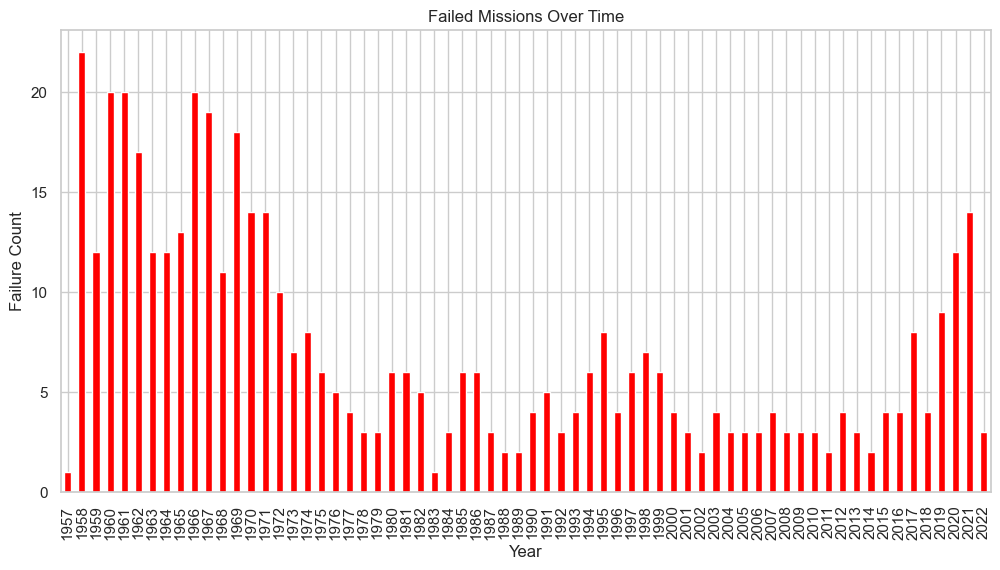

In [93]:
failures = df[df['MissionStatus']!="Success"].groupby('Year').size()

plt.figure(figsize=(12,6))
failures.plot(kind='bar', color="red")
plt.title("Failed Missions Over Time")
plt.ylabel("Failure Count")
plt.show()


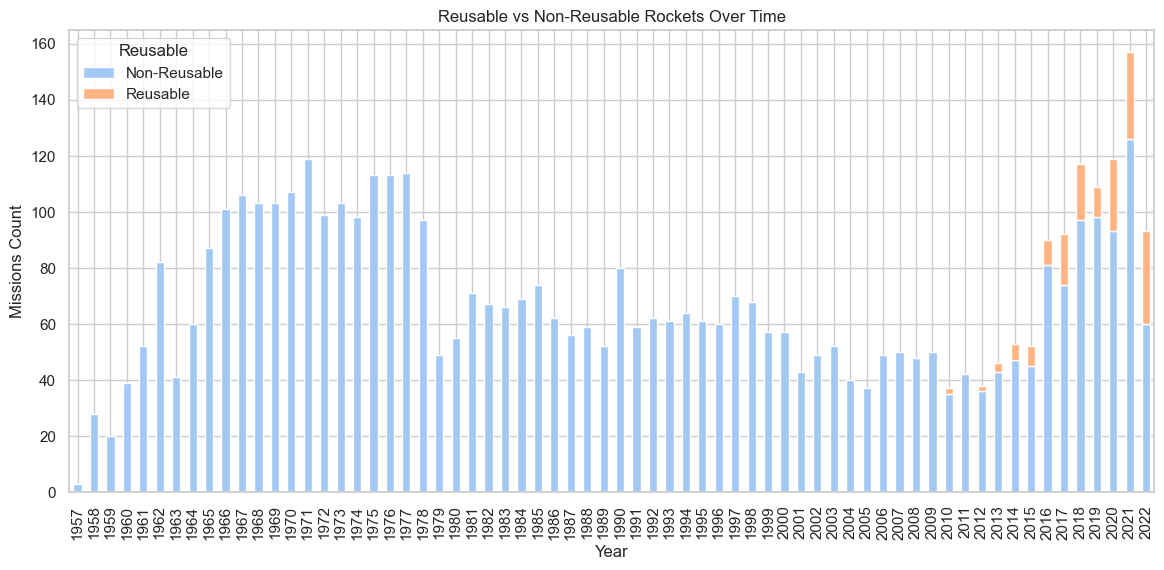

In [94]:
df['Reusable'] = df['Rocket'].apply(lambda x: "Reusable" if "Falcon 9" in str(x) else "Non-Reusable")

reusable_trend = df.groupby(['Year','Reusable']).size().unstack(fill_value=0)

reusable_trend.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Reusable vs Non-Reusable Rockets Over Time")
plt.ylabel("Missions Count")
plt.show()


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\1046102318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mission_counts.index, y=mission_counts.values, palette="cubehelix")


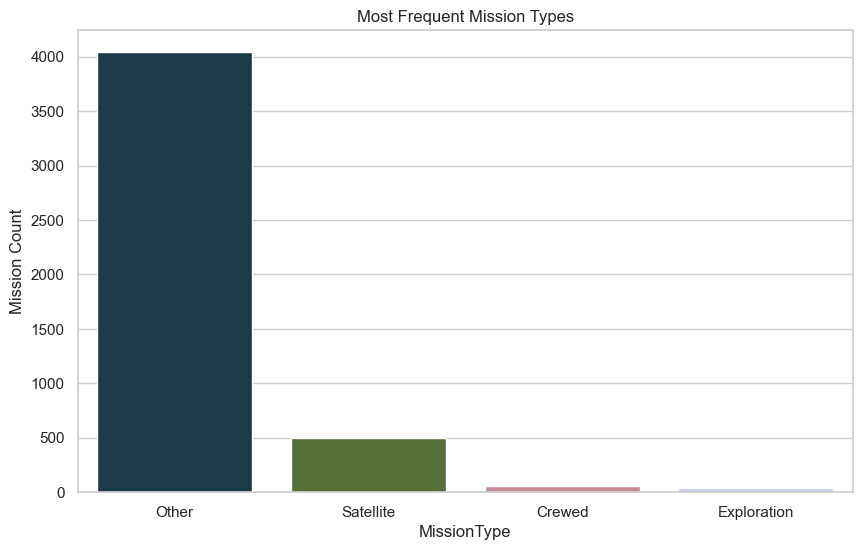

In [95]:
mission_counts = df['MissionType'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=mission_counts.index, y=mission_counts.values, palette="cubehelix")
plt.title("Most Frequent Mission Types")
plt.ylabel("Mission Count")
plt.show()


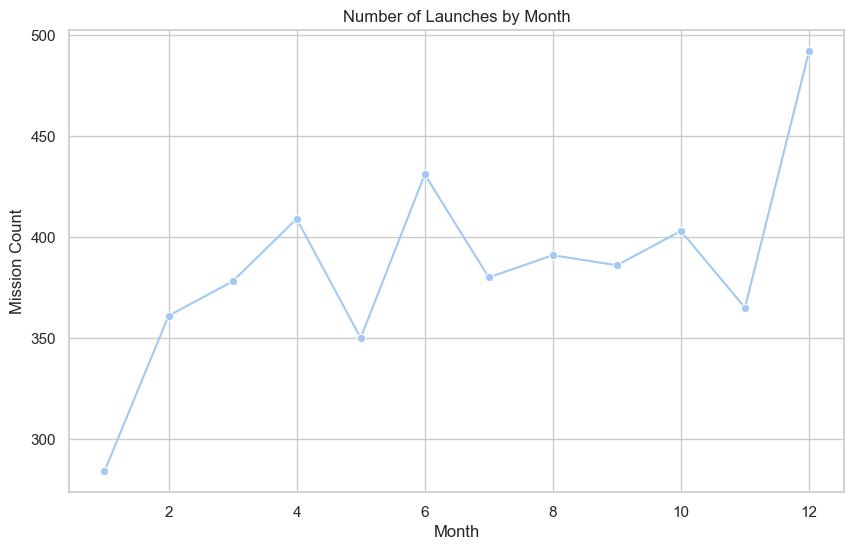

In [97]:
monthly_launches = df.groupby('Month').size()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_launches.index, y=monthly_launches.values, marker="o")
plt.title("Number of Launches by Month")
plt.xlabel("Month")
plt.ylabel("Mission Count")
plt.savefig("monthly_trend.png",dpi=300)
plt.show()


In [98]:
df_sorted = df.sort_values(['Company','Date'])
df_sorted['PrevDate'] = df_sorted.groupby('Company')['Date'].shift(1)
df_sorted['DaysSinceLastLaunch'] = (df_sorted['Date'] - df_sorted['PrevDate']).dt.days

avg_days = df_sorted.groupby('Company')['DaysSinceLastLaunch'].mean().sort_values()
print(avg_days.head(10))


Company
RVSN USSR            8.402027
SpaceX              32.961326
ULA                 37.853333
US Navy             40.687500
Arianespace         47.633562
Boeing              48.037037
VKS RF              51.544186
General Dynamics    51.608000
CASC                57.115727
US Air Force        58.593750
Name: DaysSinceLastLaunch, dtype: float64


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\1670449284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


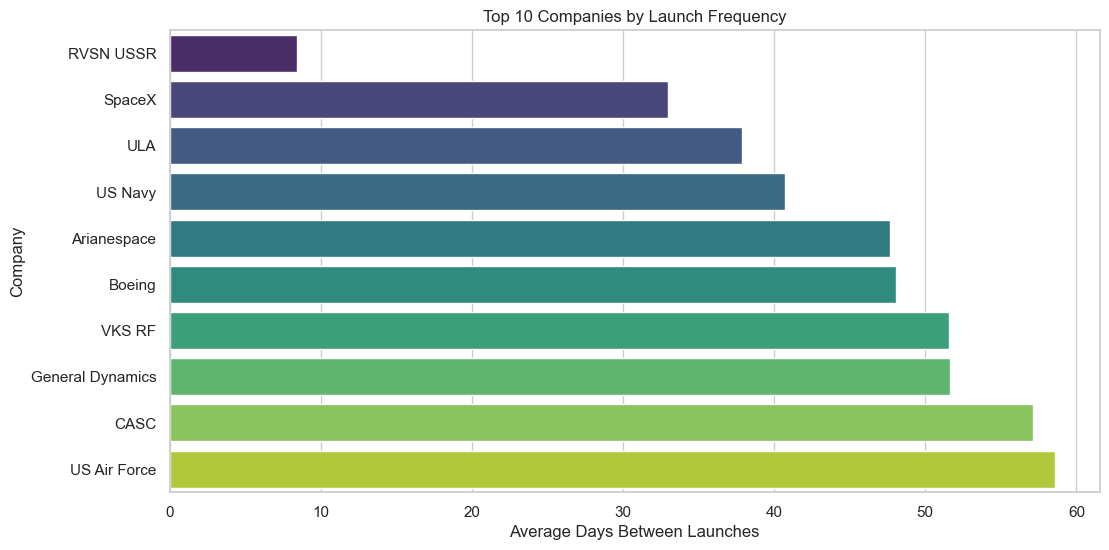

In [99]:
# Top 10 companies with the most frequent launches
top10 = avg_days.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.xlabel("Average Days Between Launches")
plt.ylabel("Company")
plt.title("Top 10 Companies by Launch Frequency")
plt.show()

C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_17908\2932540229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


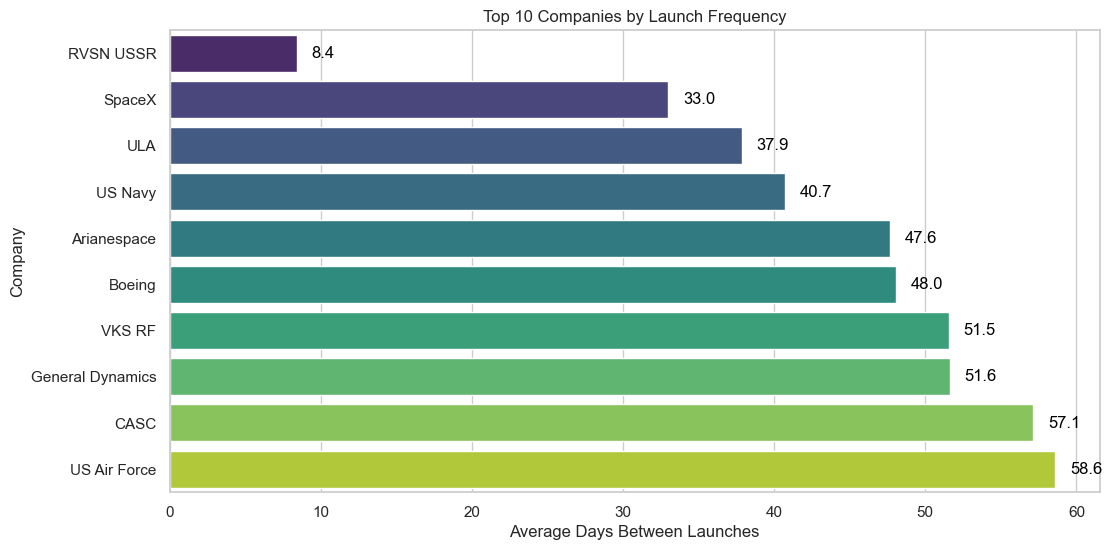

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 companies with the most frequent launches
top10 = avg_days.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

# Add values on bars
for i, v in enumerate(top10.values):
    plt.text(v + 1, i, f"{v:.1f}", color='black', va='center')

plt.xlabel("Average Days Between Launches")
plt.ylabel("Company")
plt.title("Top 10 Companies by Launch Frequency")
plt.savefig("l_freq.png", dpi=300)
plt.show()


In [103]:
landmark_missions = df[df['Mission'].str.contains("Apollo|Voyager|Falcon 9|Mars", case=False, na=False)]
print(landmark_missions[['Date','Mission','Company','MissionStatus']])


           Date                                       Mission  \
75   1960-10-10                        1M nâ Â­1 (Marsnik 1)   
77   1960-10-14                        1M nâ Â­2 (Marsnik 2)   
206  1962-10-24                        2MV-4 nâ Â­1 (Mars 1)   
211  1962-11-01                                        Mars 1   
212  1962-11-04                        2MV-3 nâ Â­1 (Mars 2)   
516  1967-01-27                                      Apollo 1   
607  1967-11-09                                      Apollo 4   
623  1968-01-22                                      Apollo 5   
640  1968-04-04                                      Apollo 6   
697  1968-10-11                                      Apollo 7   
720  1968-12-21                                      Apollo 8   
739  1969-03-03                                      Apollo 9   
763  1969-05-18                                     Apollo 10   
778  1969-07-16                                     Apollo 11   
812  1969-11-14          